In [2]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
tags = pd.read_csv('data/tags.csv')

In [4]:
tags.head()

,#,Tag,Games with this tag,Votes for this tag,Tag weight,Price (median),Userscore (median),Owners (median),Playtime (median)
0,1,Indie,5173,"277,792",54,2.49 $,78%,"950,000",02:07
1,2,Action,3894,"442,928",114,2.49 $,79%,"1,900,000",02:33
2,3,Adventure,3338,"295,347",88,2.99 $,79%,"1,900,000",02:46
3,4,Singleplayer,2549,"268,405",105,2.99 $,84%,"2,860,000",03:30
4,5,Casual,2469,"90,946",37,1.99 $,77%,"950,000",01:44


In [5]:
tags['Votes for this tag'] = tags['Votes for this tag'].apply(lambda x: int(x.replace(',','')))

In [6]:
sum = 0
j = 0
for i, row in tags.sort_values('Votes for this tag', ascending=False).iterrows():
    sum += row['Votes for this tag']
    j+=1
    if(sum/tags['Votes for this tag'].sum() > .7):
        print(j)
        break
        
sum = 0
j = 0
for i, row in tags.sort_values('Games with this tag', ascending=False).iterrows():
    sum += row['Games with this tag']
    j+=1
    if(sum/tags['Games with this tag'].sum() > .7):
        print(j)
        break

41
49


In [7]:
popular = tags.sort_values('Votes for this tag', ascending=False)[['Tag','Votes for this tag']].head(50)

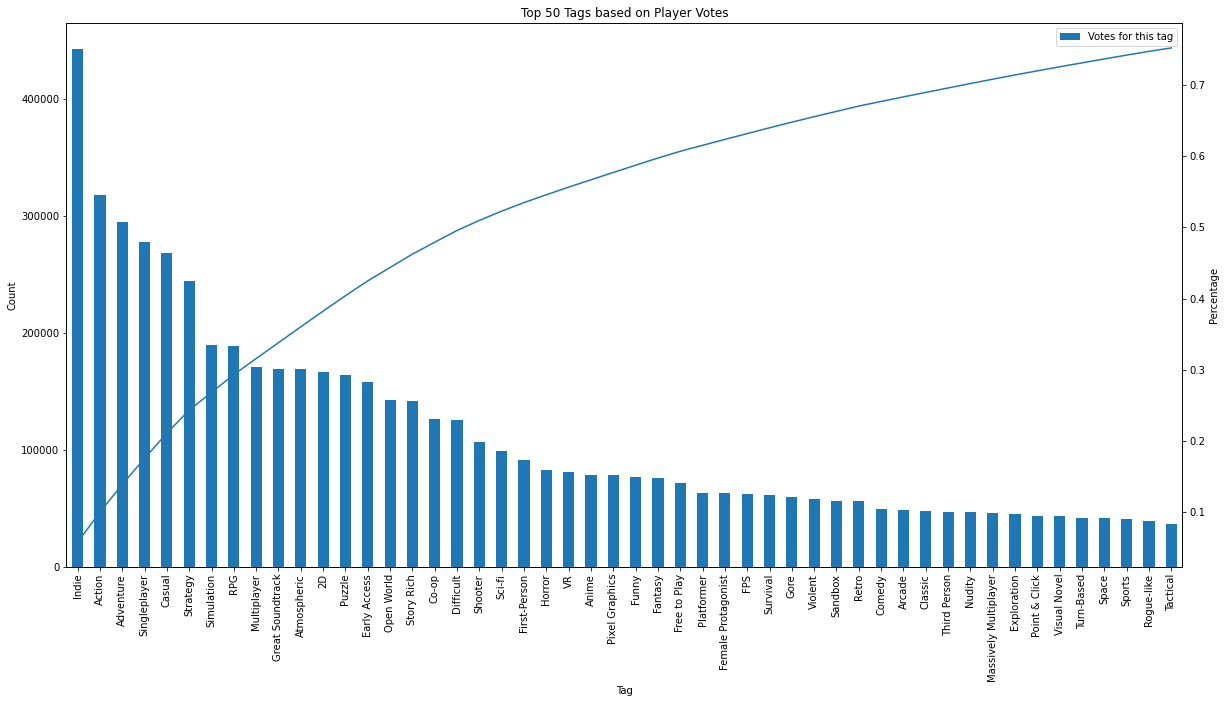

In [23]:
fig,ax = plt.subplots()
popular.plot(x='Tag',y='Votes for this tag',kind='bar',figsize=(20, 10),ax=ax)
ax.set_ylabel("Count")
ax2=ax.twinx()
ax2.plot(most['Tag'],np.cumsum(popular['Votes for this tag'])/tags['Votes for this tag'].sum())
ax2.set_ylabel("Percentage")
plt.title('Top 50 Tags based on Player Votes')
plt.savefig('popular.png')
plt.show()

In [9]:
most = tags.sort_values('Games with this tag', ascending=False)[['Tag','Games with this tag']].head(50)

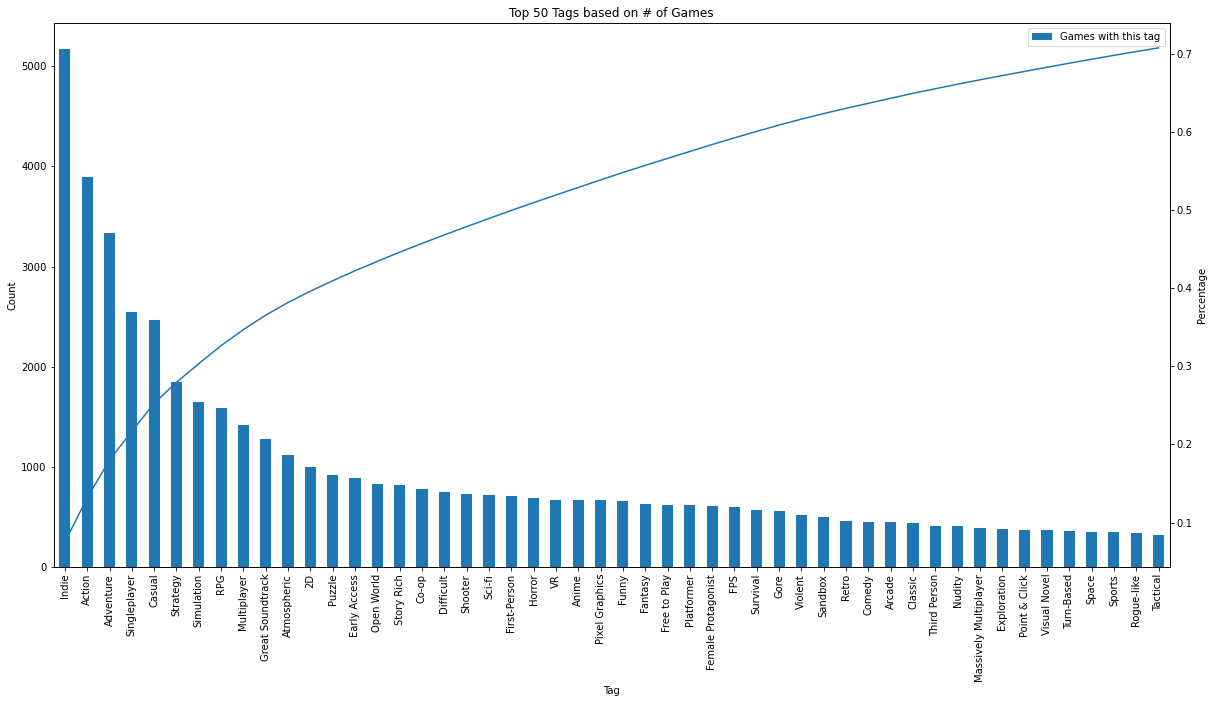

In [25]:
fig,ax = plt.subplots()
most.plot(x='Tag',y='Games with this tag',kind='bar',figsize=(20, 10),ax=ax)
ax.set_ylabel("Count")
ax2=ax.twinx()
ax2.plot(most['Tag'],np.cumsum(most['Games with this tag'])/tags['Games with this tag'].sum())
ax2.set_ylabel("Percentage")
plt.title('Top 50 Tags based on # of Games')
plt.savefig('most.png')
plt.show()

In [11]:
best_tags = {1:'Action', 2:'Adventure', 3:'Anime',  6:'Puzzle',  7:'Simulation', 8: 'Great Soundtrack', 9: 'RPG', 11: 'Space', 12: 'Casual', 13: ['Fantasy', 'RPG'],
             14: 'Card Game', 15: 'Simulation', 19: ['Fantasy','RPG'], 21: 'Adventure', 23: 'Strategy'}